In [1]:
"""=============================================================================
    Ex1: Tính toán PCA
        a) Tạo một ma trận A(3000, 3) có các giá trị ngẫu nhiên từ 1 đến 255
        b) Áp dụng tính toán PCA
        c) Trực quan hóa kết quả 
============================================================================="""
import numpy as np
from numpy import mean
from numpy import cov
from numpy.linalg import eig

##------------------------------------------------------------------------------
print('\n*** a) Tạo ma trận có các giá trị ngẫu nhiên từ 1 đến 255:')
##------------------------------------------------------------------------------
# 


print('\n*** b) Áp dụng PCA:')
# columns' means
M = mean(A.T, axis = 1)
print('- Mean vectors M:', M, '\n')

# center columns by subtracting column means
C = A - M
print('- Center matrix C', C.shape, ': \n', C[0:10], '\n')

# calculate covariance matrix of centered matrix
V = cov(C.T)
print('- Covariance matrix V', V.shape, ': \n', V)

# factorize covariance matrix
eigenvalues, eigenvectors = eig(V)

print('- Eigenvectors P', eigenvectors.shape, ': \n', eigenvectors, '\n')
print('- Eigenvalues Lambda', eigenvalues.shape, ': \n', eigenvalues, '\n')

# project data
P = eigenvectors.T.dot(C.T)
print(P.T)







*** a) Tạo ma trận có các giá trị ngẫu nhiên từ 1 đến 255:
- Matrix A (100, 3) : 
 [[ 38 236 141]
 [ 73 138 204]
 [134  80 193]
 [145 130 205]
 [ 72 238 253]
 [135  26 179]
 [ 21 255 102]
 [147 213 140]
 [253 235 157]
 [158 143  51]]

*** b) Áp dụng PCA:
- Mean vectors M: [127.94 129.43 122.12] 

- Center matrix C (100, 3) : 
 [[ -89.94  106.57   18.88]
 [ -54.94    8.57   81.88]
 [   6.06  -49.43   70.88]
 [  17.06    0.57   82.88]
 [ -55.94  108.57  130.88]
 [   7.06 -103.43   56.88]
 [-106.94  125.57  -20.12]
 [  19.06   83.57   17.88]
 [ 125.06  105.57   34.88]
 [  30.06   13.57  -71.12]] 

- Covariance matrix V (3, 3) : 
 [[5466.1579798  -197.86282828 -470.73010101]
 [-197.86282828 5658.46979798  513.99838384]
 [-470.73010101  513.99838384 5615.66222222]]
- Eigenvectors P (3, 3) : 
 [[-0.46152394  0.69413697  0.55242151]
 [ 0.58715054  0.70581162 -0.39633849]
 [ 0.66501872 -0.14143489  0.73331186]] 

- Eigenvalues Lambda (3,) : 
 [6396.16302451 5360.88160261 4983.24537287] 

[[ 1

*** a) Đọc tập tin dữ liệu vào dataframe                  ***
         f1         f2        f3        f4        f5        f6         f7  \
0 -2.403589  -0.218339 -3.015506  2.187585 -1.415101 -0.000049   2.920957   
1 -0.922966   6.564721  8.542600 -3.676891  1.526910 -6.132242  -1.284702   
2  9.381326  -0.157043  9.674137  4.059390  9.150245 -8.320246  10.076978   
3 -7.610665 -10.375051  0.398027 -6.178855  5.848558  2.276540  -1.726164   
4  8.586239  -4.265564  4.788978  4.309953  2.938052 -4.294121   6.980088   

          f8         f9       f10       f11       f12  Class  
0  -4.165317  -2.237563  1.567810  4.056278 -5.816942      3  
1  -7.841047  10.161966 -1.933277  8.959247 -2.492584      4  
2 -11.596349  -2.900057 -1.890156  0.390029 -5.383296      0  
3   9.378226   1.146725 -9.630693 -8.620247 -0.552103      2  
4  -9.878268  -5.017204  0.154492  7.647917 -1.004416      0   

*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***
CÁCH 1: Chọn k dựa trên đồ thị bi

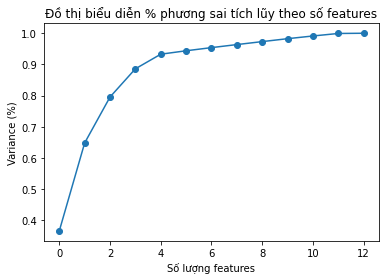

In [6]:
"""=============================================================================
Ex2: PCA - sklearn --> mở rộng thêm phân tích phương sai để xác định k
    a) Đọc tập tin dữ liệu Student_12f.xls vào dataframe.
    b) Áp dụng phương pháp PCA để giảm xuống k chiều (2 < k < 12).
       Giải thích nguyên nhân hay cơ sở về số chiều được giảm.
    c) Giảm chiều xuống còn k = 2 và trực quan hóa dữ liệu. Nhận xét kết quả.
============================================================================="""
#%%
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from sklearn.decomposition import PCA

print('=============================================================')
print('*** a) Đọc tập tin dữ liệu vào dataframe                  ***')
print('=============================================================')

# folder = './Data/Bai 3/'
data   = pd.read_excel('Student_12f_C.xls')
print(data.head(), '\n')

print('=============================================================')
print('*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***')
print('=============================================================')
#   https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
#   - The pca.explained_variance_ratio_ returns a vector of the variance explained by each dimension.
#   - The pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.
#   - The pca.explained_variance_ratio_.cumsum() will return a vector x 
#     such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

#   (1) PCA().components_: Chuyển vị của ma trận vectơ riêng EigenVectors.T
#   (2) PCA().explained_variance_: Các giá trị riêng
#   (3) PCA().explained_variance_ratio_: Tỷ lệ phương sai so với dữ liệu gốc
#   (4) Hàm numpy.cumsum()

##------------------------------------------------------------------------------
print('CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy ')
print('-------------------------------------------------------------')
##------------------------------------------------------------------------------
pca = PCA().fit(data)

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số lượng features')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features')
plt.show()

*** a) Đọc tập tin dữ liệu vào dataframe                  ***
         f1         f2        f3        f4        f5        f6         f7  \
0 -2.403589  -0.218339 -3.015506  2.187585 -1.415101 -0.000049   2.920957   
1 -0.922966   6.564721  8.542600 -3.676891  1.526910 -6.132242  -1.284702   
2  9.381326  -0.157043  9.674137  4.059390  9.150245 -8.320246  10.076978   
3 -7.610665 -10.375051  0.398027 -6.178855  5.848558  2.276540  -1.726164   
4  8.586239  -4.265564  4.788978  4.309953  2.938052 -4.294121   6.980088   

          f8         f9       f10       f11       f12  Class  
0  -4.165317  -2.237563  1.567810  4.056278 -5.816942      3  
1  -7.841047  10.161966 -1.933277  8.959247 -2.492584      4  
2 -11.596349  -2.900057 -1.890156  0.390029 -5.383296      0  
3   9.378226   1.146725 -9.630693 -8.620247 -0.552103      2  
4  -9.878268  -5.017204  0.154492  7.647917 -1.004416      0   

*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***
CÁCH 1: Chọn k dựa trên đồ thị bi

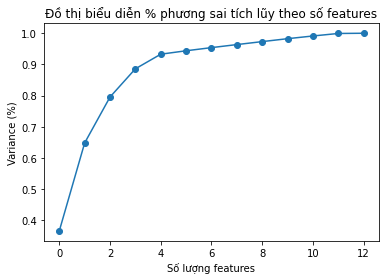

Phân tích chi tiết theo k: 

   * Với k =  1 --> phương sai tích lũy 36.59%
      - Ma trận trị riêng LAMBDA (1,)
      - Chuyển vị của ma trận vectơ riêng P_T (1, 13) : 

   * Với k =  2 --> phương sai tích lũy 64.80%
      - Ma trận trị riêng LAMBDA (2,)
      - Chuyển vị của ma trận vectơ riêng P_T (2, 13) : 

   * Với k =  3 --> phương sai tích lũy 79.54%
      - Ma trận trị riêng LAMBDA (3,)
      - Chuyển vị của ma trận vectơ riêng P_T (3, 13) : 

   * Với k =  4 --> phương sai tích lũy 88.59%
      - Ma trận trị riêng LAMBDA (4,)
      - Chuyển vị của ma trận vectơ riêng P_T (4, 13) : 

   * Với k =  5 --> phương sai tích lũy 93.28%
      - Ma trận trị riêng LAMBDA (5,)
      - Chuyển vị của ma trận vectơ riêng P_T (5, 13) : 

   * Với k =  6 --> phương sai tích lũy 94.38%
      - Ma trận trị riêng LAMBDA (6,)
      - Chuyển vị của ma trận vectơ riêng P_T (6, 13) : 

   * Với k =  7 --> phương sai tích lũy 95.39%
      - Ma trận trị riêng LAMBDA (7,)
      - Chuyển vị của ma trậ

<Figure size 576x432 with 0 Axes>

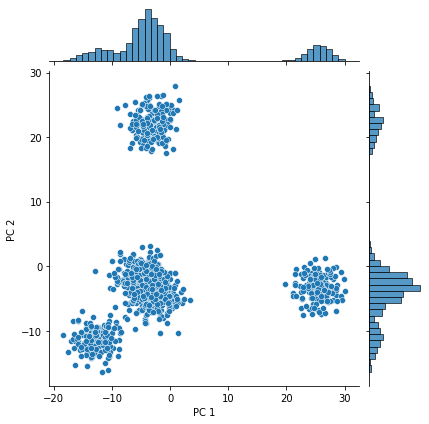

        PC 1       PC 2  Class
0  -0.692211  -1.070005      3
1  -4.781787  -3.437346      4
2 -16.692405  -8.542941      0
3  -3.687761  24.972640      2
4  -8.926874  -9.483645      0 



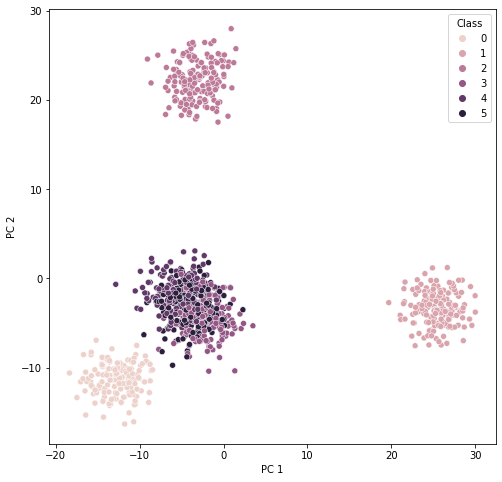

*** d) CHUẨN HÓA dữ liệu trước khi thực hiện PCA     ***
- Ma trận B_T (1000, 2)
       PC 1      PC 2
0  0.117332  0.361234
1 -0.565131  0.437173
2 -1.047213  2.946199
3 -3.092225 -2.775055
4  0.166390  2.345975 

       PC 1      PC 2  Class
0  0.117332  0.361234      3
1 -0.565131  0.437173      4
2 -1.047213  2.946199      0
3 -3.092225 -2.775055      2
4  0.166390  2.345975      0 



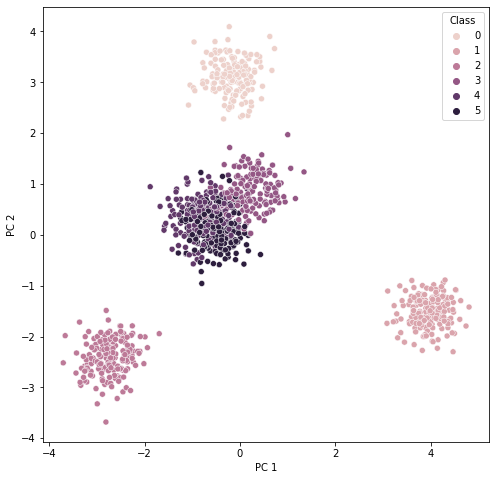

In [8]:
"""=============================================================================
Ex2: PCA - sklearn --> mở rộng thêm phân tích phương sai để xác định k
    a) Đọc tập tin dữ liệu Student_12f.xls vào dataframe.
    b) Áp dụng phương pháp PCA để giảm xuống k chiều (2 < k < 12).
       Giải thích nguyên nhân hay cơ sở về số chiều được giảm.
    c) Giảm chiều xuống còn k = 2 và trực quan hóa dữ liệu. Nhận xét kết quả.
============================================================================="""
#%%
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from sklearn.decomposition import PCA

print('=============================================================')
print('*** a) Đọc tập tin dữ liệu vào dataframe                  ***')
print('=============================================================')

# folder = './Data/Bai 3/'
data   = pd.read_excel('Student_12f_C.xls')
print(data.head(), '\n')

print('=============================================================')
print('*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***')
print('=============================================================')
#   https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
#   - The pca.explained_variance_ratio_ returns a vector of the variance explained by each dimension.
#   - The pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.
#   - The pca.explained_variance_ratio_.cumsum() will return a vector x 
#     such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

#   (1) PCA().components_: Chuyển vị của ma trận vectơ riêng EigenVectors.T
#   (2) PCA().explained_variance_: Các giá trị riêng
#   (3) PCA().explained_variance_ratio_: Tỷ lệ phương sai so với dữ liệu gốc
#   (4) Hàm numpy.cumsum()

##------------------------------------------------------------------------------
print('CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy ')
print('-------------------------------------------------------------')
##------------------------------------------------------------------------------
pca = PCA().fit(data)

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số lượng features')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features')
plt.show()
# Nhận xét:
#   - #f =  0: giữ lại    0%  phương sai so với dữ liệu gốc
#   - #f =  3: giữ lại ~ 85%  phương sai so với dữ liệu gốc
#   - #f >  3: giữ lại > 90%  phương sai so với dữ liệu gốc

print('Phân tích chi tiết theo k: \n')
for k in range(1, 13):
    pca = PCA(k)
    pca.fit(data)
      
    var = pca.explained_variance_ratio_.sum() * 100
    print('   * Với k = %2d' %k, '--> phương sai tích lũy %.2f%%' %var)

    # Test - BEGIN
    print('      - Ma trận trị riêng LAMBDA', pca.explained_variance_.shape)   
    print('      - Chuyển vị của ma trận vectơ riêng P_T', pca.components_.shape, ': \n') # gia tri vt
    # Test - END


##------------------------------------------------------------------------------
print('-------------------------------------------------------------')
print('CÁCH 2: Chọn k dựa trên ngưỡng phương sai tích lũy mong muốn ')
print('-------------------------------------------------------------')
##------------------------------------------------------------------------------
print('   * Giả sử muốn giữ lại 90%')
threshold = .9
percent   = threshold * 100
pca       = PCA(threshold)

pca.fit(data)
k   = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('      - Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %d' %k,
      ' (k = %d' %k, '--> %.2f%%)' %var, '\n')

print('   * Phân tích chi tiết theo ngưỡng phương sai:')
A = np.array([.5, .6, .7, .8, .9, .95, .99])
for x in A:
    percent   = x * 100
    pca       = PCA(x)

    pca.fit(data)
    k   = pca.n_components_
    var = sum(pca.explained_variance_ratio_) * 100
    print('      - Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %2d' %k,
          ' (k = %2d' %k, '--> %.2f%%)' %var)

print('\n=============================================================')
print('*** c) Giảm chiều còn k = 2 và trực quan hóa dữ liệu      ***')
print('=============================================================')
k   = 2
pca = PCA(k)
pca.fit(data)

# transform data
B = pca.transform(data)
principalDf = pd.DataFrame(data = B, columns = ['PC 1', 'PC 2'])
print('- Ma trận B_T', principalDf.head(), '\n')

# Trực quan hóa dữ liệu (KHÔNG phân loại)
plt.figure(figsize = (8, 6))
sns.jointplot(x = 'PC 1', y = 'PC 2', data = principalDf)              
plt.show()

# Lấy cột phân loại (Class) trong file dữ liệu
y = np.array(data.Class)
y = pd.DataFrame(data = y, columns = ['Class'])

# Ghép cột phân loại (Class) vào ma trận PCA
finalDf = pd.concat([principalDf, y], axis = 1)
print(finalDf.head(), '\n')

# Trực quan hóa dữ liệu (CÓ phân loại)
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'PC 1', y = 'PC 2', data = finalDf, hue = 'Class', legend = 'full')              
plt.show()


print('========================================================')
print('*** d) CHUẨN HÓA dữ liệu trước khi thực hiện PCA     ***')
print('========================================================')
from sklearn.preprocessing import StandardScaler
k = 2
pca_norm  = PCA(k)
data_norm = StandardScaler().fit_transform(data)
pca_norm.fit(data_norm)

# transform data
B_norm = pca_norm.transform(data_norm)
print('- Ma trận B_T', B_norm.shape)

principalDf_norm = pd.DataFrame(data = B_norm, columns = ['PC 1', 'PC 2'])
print(principalDf_norm.head(), '\n')

# Lấy cột phân loại (Class) trong file dữ liệu
y = np.array(data.Class)
y = pd.DataFrame(data = y, columns = ['Class'])

# Ghép cột phân loại (Class) vào ma trận PCA
finalDf_norm = pd.concat([principalDf_norm, y], axis = 1)
print(finalDf_norm.head(), '\n')

# Trực quan hóa dữ liệu (CÓ phân loại)
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'PC 1', y = 'PC 2', data = finalDf_norm, hue = 'Class', legend = 'full')              
plt.show()



*** a) Đọc dữ liệu từ Iris.xls vào dataframe:
   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

*** b) Tìm correlation matrix, trực quan hóa:
   - Ma trận hiệp phương sai (4, 4) : 
              sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000

*** c) Thực hiện giảm chiều dữ liệu, k= 2, với sklearn.PCA:
   - Ma trận A: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1

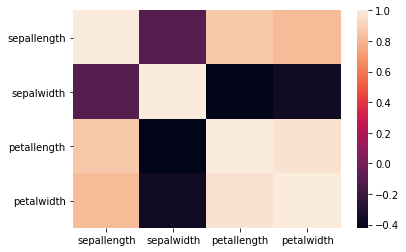

<Figure size 576x432 with 0 Axes>

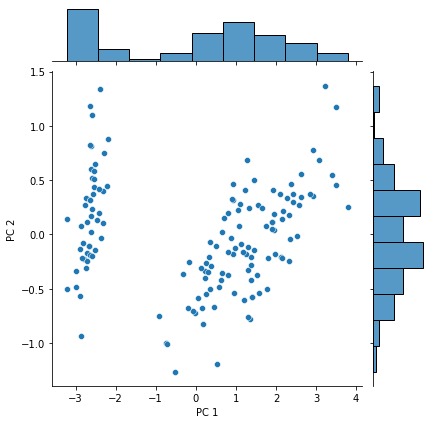

       PC 1      PC 2        Types
0 -2.684207  0.326607  Iris-setosa
1 -2.715391 -0.169557  Iris-setosa
2 -2.889820 -0.137346  Iris-setosa
3 -2.746437 -0.311124  Iris-setosa
4 -2.728593  0.333925  Iris-setosa 



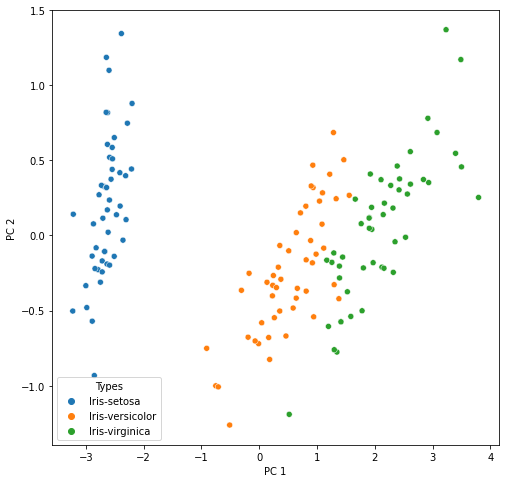

In [9]:
"""=============================================================================
   Ex4: PCA - sklearn
      a) Đọc dữ liệu từ Iris.xls vào dataframe
      b) Tìm correlation matrix, trực quan hóa   
      c) Dùng PCA giảm xuống còn 2 chiều (ban đầu 4 chiều, không kể cột loại iris)
      d) Trực quan hóa dữ liệu sau khi giảm chiều
============================================================================="""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

##------------------------------------------------------------------------------
print('\n*** a) Đọc dữ liệu từ Iris.xls vào dataframe:')
##------------------------------------------------------------------------------
# folder = 'Data/Bai 3/'
data = pd.read_excel('Iris.xls')
print(data.head())

##------------------------------------------------------------------------------
print('\n*** b) Tìm correlation matrix, trực quan hóa:')
##------------------------------------------------------------------------------
corr = data.corr()
print('   - Ma trận hiệp phương sai', corr.shape, ': \n', corr)
sns.heatmap(corr, xticklabels = corr.columns.values, 
                  yticklabels = corr.columns.values)

##------------------------------------------------------------------------------
print('\n*** c) Thực hiện giảm chiều dữ liệu, k= 2, với sklearn.PCA:')
##------------------------------------------------------------------------------
A = data[['sepallength','sepalwidth','petallength','petalwidth']].values
print('   - Ma trận A: \n', A[0:5], '\n')

pca = PCA(2)
pca.fit(A)

# access values and vectors
# components_ : array, shape (n_components, n_features)
# Các trục chính trong không gian feature, biểu thị
# các hướng của phương sai tối đa trong dữ liệu
# explained_variance_ : array, shape (n_components,)
# Số lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.Components:\n', pca.components_)
print('PCA.Shape: ', pca.components_.shape)
print('PCA.Explained variance: ', pca.explained_variance_)
print('PCA.Explained variance shape: ', pca.explained_variance_.shape)

# transform data
B = pca.transform(A)
print('         - Ma trận B_T', B.shape, ': \n', B[0:5], '\n')
print(pca.explained_variance_ratio_)

##------------------------------------------------------------------------------
print('\n*** d) Trực quan hóa dữ liệu (KHÔNG phân loại):')
##------------------------------------------------------------------------------
principalDf = pd.DataFrame(data = B, columns = ['PC 1', 'PC 2'])
print(principalDf.head(), '\n')

principalDf = pd.DataFrame(data = B, columns = ['PC 1', 'PC 2'])
print(principalDf.head(), '\n')

# Trực quan hóa dữ liệu (KHÔNG phân loại)
plt.figure(figsize = (8, 6))
sns.jointplot(x = 'PC 1', y = 'PC 2', data = principalDf)              
plt.show()

# Lấy cột phân loại (Types) trong file dữ liệu
y = np.array(data.iris)
y = pd.DataFrame(data = y, columns = ['Types'])

# Ghép cột phân loại (Class) vào ma trận PCA
finalDf = pd.concat([principalDf, y], axis = 1)
print(finalDf.head(), '\n')

# Trực quan hóa dữ liệu (CÓ phân loại)
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'PC 1', y = 'PC 2', data = finalDf, hue = 'Types', legend = 'full')              
plt.show()
